Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)

***

# A4 - Transparency

###### Co-Work by `goto` and `xiyu` Group 5 
Please use the follwing structure as a starting point. Extend and change the notebook according to your needs. This structure should help you to guide you through your analysis. This notebook is the foundation for condensing your results and writing your reflection in the end. So please read what we expect from you regarding the reflection first to structure your analysis accordingly.

In [2]:
import requests
import json
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## [1] General understanding
> What is the model about and who is using it?

Model5: articlequality
It is used by Wikipidians to periodically assess the quality of articles on wikipedia. 

>* What is your model about?

Different from the model `draft quality`, the model `articlequality` is used for the assesment of existing articles, i.e.: articles that have passed the initial curation:<br>
_draftquality_ – predicts if the article will need to be speedy deleted (spam, vandalism, attack, or OK)<br>
_articlequality_ – predicts the (Wikipedia 1.0-like) assessment class of an article or draft<br>
This model is used for periodically assessment on large wikipedias. This `articlequality` model is trained to replicate the article quality assessment made by humans (see: [Wiki Label](https://meta.wikimedia.org/wiki/Wiki_labels)). The model "has been used to help WikiProjects triage re-
assessment work and to explore the editing dynamics that lead to article quality improvements". 
    
_Note: It uses structural criteria such as the number of sections, references, infoboxes etc., so_ quality 
_refers rather to structural issues, not the semantics nor the content!_
    
_References:_
[ORES#Article_quality](https://www.mediawiki.org/wiki/ORES#Article_quality)

>* Why is this model useful?

Depends on _who_ is asking: For Wikipedia itself, it is useful as it points editors towards articles that may need a revision.
For the rest, it is up to interpretation: Considering the criteria for _quality_ , this model may indicate the effort people put into writing an article and how much they have to say it - and hence it may reflect the actual public interest about a topic.

>* Who is using this model?

[Ores' homepage](https://www.mediawiki.org/wiki/ORES) makes it sound like mainly Wikipedia is using it. A web search was of no help but surely anyone who has to deal with trends would use this, e.g. magazines: There could be a direct correlation between the _change of the score_ regardind a specific topic and its _perception in the public_ , just like the number of google-searches. This is just a thought, though.

>* What are stakeholder or users of ORES?

Researchers, Wikipedia insiders, personal users with interest in online knowledge community

>* Why is this model useful to wikipedia?

It helps to identify pages that could be improved and thus can raise Wikipedias overall quality.

>* What applications/projects/... within wikipedia are using this model?
  
  12 projects are using this model: list of projects please see following output.


In [3]:
api_call = requests.get('https://ores.wikimedia.org/v3/scores/')
scores = api_call.json()
scores

{'arwiki': {'models': {'articletopic': {'version': '1.2.0'},
   'damaging': {'version': '0.5.0'},
   'goodfaith': {'version': '0.5.0'}}},
 'bnwiki': {'models': {'reverted': {'version': '0.5.0'}}},
 'bswiki': {'models': {'damaging': {'version': '0.5.0'},
   'goodfaith': {'version': '0.5.0'}}},
 'cawiki': {'models': {'damaging': {'version': '0.5.1'},
   'goodfaith': {'version': '0.5.1'}}},
 'cswiki': {'models': {'articletopic': {'version': '1.2.0'},
   'damaging': {'version': '0.6.0'},
   'goodfaith': {'version': '0.6.0'}}},
 'dewiki': {'models': {'damaging': {'version': '0.5.1'},
   'goodfaith': {'version': '0.5.1'}}},
 'elwiki': {'models': {'reverted': {'version': '0.5.0'}}},
 'enwiki': {'models': {'articlequality': {'version': '0.8.2'},
   'articletopic': {'version': '1.2.0'},
   'damaging': {'version': '0.5.1'},
   'draftquality': {'version': '0.2.1'},
   'drafttopic': {'version': '1.2.0'},
   'goodfaith': {'version': '0.5.1'},
   'wp10': {'version': '0.8.2'}}},
 'enwiktionary': {'mo

In [4]:
projects = []
for key in scores:
    if "articlequality" in scores[key]['models'].keys():
        projects.append(key)
projects
print (len(projects), " projects are using this model: " , [x for x in projects])

12  projects are using this model:  ['enwiki', 'euwiki', 'fawiki', 'frwiki', 'glwiki', 'ptwiki', 'ruwiki', 'simplewiki', 'svwiki', 'testwiki', 'trwiki', 'ukwiki']


## [2] API
> What does the ORES API (v3) tell you about a specific model? What functions does the API offer?

Use the API to investigate your model: https://ores.wikimedia.org/v3/#/. What do the follwing API calls do and what do they tell you about your model?
> _We offer short answers under each question, the codes for model investigation is written after the short answers._

* (1) [https://ores.wikimedia.org/v3/scores/]<br>
Different Wikipedia pages are supported by different models.
* (2) [https://ores.wikimedia.org/v3/scores/?model_info]<br>
This call returns a long JSON containing information about _all_ the models available for _all_ wikis, from `arwiki` to `zhwiki`: For each xwiki, the system they are running on, labels, score-schemes, models can be applied to the wikiproject, version of each model... 
* (3) [https://ores.wikimedia.org/v3/scores/enwiki]<br>
Returns a short JSON containing the models available for enwiki and their version numbers. The german counterpart,  _../dewiki_ yields two models: _damaging_ and _goodfaith_.
* (4) [https://ores.wikimedia.org/v3/scores/enwiki?models=articlequality&model_info]<br>
Ignoring the first link, each link above narrows down the result of its predecessor, so this link yields a JSON with Information about the model `articlequality` for the english wikipedia `enwiki`.
* (5) [https://ores.wikimedia.org/v3/scores/enwiki?models=articlequality&revids=485104318]<br>
Above link (using the second revid from the example in ORES' own page), yields a JSON with some basic info and for each quality-category (B, C, FA, ...) the value for the prediction that this article belongs to the respective category:

```
{
  "enwiki": {
    "models": {
      "articlequality": {
        "version": "0.8.2"
      }
    },
    "scores": {
      "485104318": {
        "articlequality": {
          "score": {
            "prediction": "Stub",
            "probability": {
              "B": 0.010927696716957773,
              "C": 0.01631553410794528,
              "FA": 0.0015486744281834254,
              "GA": 0.002918825922529176,
              "Start": 0.06734253108090484,
              "Stub": 0.9009467377434794
} } } } } } }
```
The following two links use the revid 485104318 as well.
* (6) [https://ores.wikimedia.org/v3/scores/enwiki/485104318/articlequality?model_info]<br>
This call yields the "combination" of (4) and (5), so this JSON includes both information about the model and the result for a specific article.
* (7) [https://ores.wikimedia.org/v3/scores/enwiki/485104318/articlequality?features=true]<br>
This shows (5) predeceded by `features`: Here it is possible to see the counts for the criteria:
```
{
  "enwiki": {
    "models": {
      "articlequality": {
        "version": "0.8.2"
      }
    },
    "scores": {
      "485104318": {
        "articlequality": {
          "features": {
            "feature.english.stemmed.revision.stems_length": 582,
            "feature.enwiki.infobox_images": 0,
            "feature.enwiki.main_article_templates": 0.0,
            "feature.enwiki.revision.category_links": 2.0,
            "feature.enwiki.revision.cite_templates": 0.0,
            "feature.enwiki.revision.cn_templates": 0.0,
            "feature.enwiki.revision.image_links": 0.0,
            "feature.enwiki.revision.image_template": 0.0,
            "feature.enwiki.revision.images_in_tags": 0,
            "feature.enwiki.revision.images_in_templates": 0,
            "feature.enwiki.revision.infobox_templates": 0.0,
            "feature.enwiki.revision.paragraphs_without_refs_total_length": 0.0,
            "feature.enwiki.revision.shortened_footnote_templates": 0.0,
            "feature.enwiki.revision.who_templates": 0.0,
            "feature.len(<datasource.english.idioms.revision.matches>)": 0.0,
            "feature.len(<datasource.english.words_to_watch.revision.matches>)": 1.0,
            "feature.len(<datasource.wikitext.revision.words>)": 126.0,
            "feature.wikitext.revision.chars": 1217.0,
            "feature.wikitext.revision.content_chars": 1003.0,
            "feature.wikitext.revision.external_links": 4.0,
            "feature.wikitext.revision.headings_by_level(2)": 1.0,
            "feature.wikitext.revision.headings_by_level(3)": 0.0,
            "feature.wikitext.revision.ref_tags": 3.0,
            "feature.wikitext.revision.templates": 1.0,
            "feature.wikitext.revision.wikilinks": 6.0
          },
          "score": {
            "prediction": "Stub",
            "probability": {
              "B": 0.010927696716957773,
              "C": 0.01631553410794528,
              "FA": 0.0015486744281834254,
              "GA": 0.002918825922529176,
              "Start": 0.06734253108090484,
              "Stub": 0.9009467377434794
} } } } } } }
```

##### _For (1) [https://ores.wikimedia.org/v3/scores/]_

In [5]:
# We already checked this api for the question of projects using the model "articlequality".
api_call = requests.get('https://ores.wikimedia.org/v3/scores/')
scores = api_call.json()
#It lists wikiprojects with models (with concrete version) each project is using.

##### _For(2) [https://ores.wikimedia.org/v3/scores/?model_info]_

In [6]:
api_call = requests.get('https://ores.wikimedia.org/v3/scores/?model_info')
info = api_call.json()
#info provides really huge amount of information, we will choose model 'articlequality' for project 'enwiki' as example

In [7]:
ae_info = info['enwiki']['models']['articlequality']
articlequality_info = pd.DataFrame.from_dict(ae_info)
articlequality_info

,environment,params,score_schema,statistics,type,version
machine,x86_64,NaN,NaN,NaN,GradientBoosting,0.8.2
platform,Linux-4.9.0-11-amd64-x86_64-with-debian-9.12,NaN,NaN,NaN,GradientBoosting,0.8.2
processor,,NaN,NaN,NaN,GradientBoosting,0.8.2
python_branch,,NaN,NaN,NaN,GradientBoosting,0.8.2
python_build,"[default, Sep 27 2018 17:25:39]",NaN,NaN,NaN,GradientBoosting,0.8.2
python_compiler,GCC 6.3.0 20170516,NaN,NaN,NaN,GradientBoosting,0.8.2
python_implementation,CPython,NaN,NaN,NaN,GradientBoosting,0.8.2
python_revision,,NaN,NaN,NaN,GradientBoosting,0.8.2
python_version,3.5.3,NaN,NaN,NaN,GradientBoosting,0.8.2
release,4.9.0-11-amd64,NaN,NaN,NaN,GradientBoosting,0.8.2


##### _For (3):  [https://ores.wikimedia.org/v3/scores/enwiki]_ 

In [50]:
api_call = requests.get('https://ores.wikimedia.org/v3/scores/enwiki')
enwiki = api_call.json()
enwiki
# 7 models are used in project enwiki

{'enwiki': {'models': {'articlequality': {'version': '0.8.2'},
   'articletopic': {'version': '1.2.0'},
   'damaging': {'version': '0.5.1'},
   'draftquality': {'version': '0.2.1'},
   'drafttopic': {'version': '1.2.0'},
   'goodfaith': {'version': '0.5.1'},
   'wp10': {'version': '0.8.2'}}}}

In [51]:
# we can also check other project dewiki
api_call = requests.get('https://ores.wikimedia.org/v3/scores/dewiki')
dewiki = api_call.json()
dewiki
# only damaging and goodfaith models are used for project dewiki.

{'dewiki': {'models': {'damaging': {'version': '0.5.1'},
   'goodfaith': {'version': '0.5.1'}}}}

##### _For (4): [https://ores.wikimedia.org/v3/scores/enwiki?models=articlequality&model_info]_

In [52]:
api_call = requests.get('https://ores.wikimedia.org/v3/scores/enwiki?models=articlequality&model_info')
enwiki_articlequality_info = api_call.json()
enwiki_articlequality_info
# The information we get here is the same as what we did for (2). This api provides detailed information of the model 
# article quality for project enwiki.

{'enwiki': {'models': {'articlequality': {'environment': {'machine': 'x86_64',
     'platform': 'Linux-4.9.0-11-amd64-x86_64-with-debian-9.12',
     'processor': '',
     'python_branch': '',
     'python_build': ['default', 'Sep 27 2018 17:25:39'],
     'python_compiler': 'GCC 6.3.0 20170516',
     'python_implementation': 'CPython',
     'python_revision': '',
     'python_version': '3.5.3',
     'release': '4.9.0-11-amd64',
     'revscoring_version': '2.8.2',
     'system': 'Linux',
     'version': '#1 SMP Debian 4.9.189-3+deb9u1 (2019-09-20)'},
    'params': {'ccp_alpha': 0.0,
     'center': True,
     'criterion': 'friedman_mse',
     'init': None,
     'label_weights': None,
     'labels': ['Stub', 'Start', 'C', 'B', 'GA', 'FA'],
     'learning_rate': 0.01,
     'loss': 'deviance',
     'max_depth': 7,
     'max_features': 'log2',
     'max_leaf_nodes': None,
     'min_impurity_decrease': 0.0,
     'min_impurity_split': None,
     'min_samples_leaf': 1,
     'min_samples_split': 

##### _For (5): [https://ores.wikimedia.org/v3/scores/enwiki?models=articlequality&revids=485104318]_

In [62]:
api_call = requests.get('https://ores.wikimedia.org/v3/scores/enwiki?models=articlequality&revids=485104318')
rev_485104318 = api_call.json()
rev_485104318
rev = pd.DataFrame.from_dict(rev_485104318)
rev

,enwiki
models,{'articlequality': {'version': '0.8.2'}}
scores,{'485104318': {'articlequality': {'score': {'p...


In [59]:
rev_485104318['enwiki']['scores']['485104318']

{'articlequality': {'score': {'prediction': 'Stub',
   'probability': {'B': 0.010927696716957773,
    'C': 0.01631553410794528,
    'FA': 0.0015486744281834254,
    'GA': 0.002918825922529176,
    'Start': 0.06734253108090484,
    'Stub': 0.9009467377434794}}}}

This API tells us about the assessment of article quality for article with revision id 485104318 on english wikipedia using model `article quality`. The article with revision id 485104318 is assesses at 'Stub' (the worst quality category) because on the probabilistic calculation and 'Stub' dominates with more than 90% possibility.

##### _For (6):[https://ores.wikimedia.org/v3/scores/enwiki/485104318/articlequality?model_info]_

In [63]:
api_call = requests.get('https://ores.wikimedia.org/v3/scores/enwiki/485104318/articlequality?model_info') 
rev_model_info = api_call.json()
rev_model_info

{'enwiki': {'models': {'articlequality': {'environment': {'machine': 'x86_64',
     'platform': 'Linux-4.9.0-11-amd64-x86_64-with-debian-9.12',
     'processor': '',
     'python_branch': '',
     'python_build': ['default', 'Sep 27 2018 17:25:39'],
     'python_compiler': 'GCC 6.3.0 20170516',
     'python_implementation': 'CPython',
     'python_revision': '',
     'python_version': '3.5.3',
     'release': '4.9.0-11-amd64',
     'revscoring_version': '2.8.2',
     'system': 'Linux',
     'version': '#1 SMP Debian 4.9.189-3+deb9u1 (2019-09-20)'},
    'params': {'ccp_alpha': 0.0,
     'center': True,
     'criterion': 'friedman_mse',
     'init': None,
     'label_weights': None,
     'labels': ['Stub', 'Start', 'C', 'B', 'GA', 'FA'],
     'learning_rate': 0.01,
     'loss': 'deviance',
     'max_depth': 7,
     'max_features': 'log2',
     'max_leaf_nodes': None,
     'min_impurity_decrease': 0.0,
     'min_impurity_split': None,
     'min_samples_leaf': 1,
     'min_samples_split': 

In [64]:
rev_model_info['enwiki'].keys()

dict_keys(['models', 'scores'])

By extracting the keys, we can see that the api call combines the information we found in (4) for `models` and in (5) for `scores` for specific revid. We can see that at what category a specific article revision is assessed and what model is used under what specific settings and parameters.


##### _For (7): [https://ores.wikimedia.org/v3/scores/enwiki/485104318/articlequality?features=true]_

In [97]:
api_call =requests.get('https://ores.wikimedia.org/v3/scores/enwiki/485104318/articlequality?features=true') 
features = api_call.json()
features = features['enwiki']['scores']['485104318']['articlequality']['features']

In [101]:
#features = pd.DataFrame(features)
features = pd.DataFrame(features.items(), columns = ['feature','value'])
features

,feature,value
0,feature.english.stemmed.revision.stems_length,582.0
1,feature.enwiki.infobox_images,0.0
2,feature.enwiki.main_article_templates,0.0
3,feature.enwiki.revision.category_links,2.0
4,feature.enwiki.revision.cite_templates,0.0
5,feature.enwiki.revision.cn_templates,0.0
6,feature.enwiki.revision.image_links,0.0
7,feature.enwiki.revision.image_template,0.0
8,feature.enwiki.revision.images_in_tags,0.0
9,feature.enwiki.revision.images_in_templates,0.0


In the section of General Understanding, we have found out that the quality assessment is almost based on structual criteria such as number of sections, if there is an infobox, references etc. The features list the counts for each structural criteria of the article with specific rev_id.

### Feature Injection
Please check out the _feature injection_ feature of ORES: https://www.mediawiki.org/wiki/ORES/Feature_injection

**Example:**

     # Here you can get the prediction for a revision, if the user would habe been anonymous:
     https://ores.wikimedia.org/v3/scores/enwiki/991397091/damaging?features&feature.revision.user.is_anon=true

To do some experiments on the feature injection, we will stick to our rev_id = 485104318 and see how the feature changements will influence the assessment of the article.

In [138]:
test_article = int(input("On which article you want to try feature injection: "))
injected_feature = str(input("On which feature you want to do experience: ") )
injected_feature_value = float(input("To what value you want set this feature: "))

On which article you want to try feature injection: 485104318
On which feature you want to do experience: feature.enwiki.revision.cite_templates
To what value you want set this feature: 13.0


In [139]:
# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/yuxin16',
    'From': 'xin.yu@fu-berlin.de'
}

def get_ores_data(rev_id, headers,endpoint):
    
    # Define the endpoint: This is an example!
    #endpoint = 'https://ores.wikimedia.org/v3/scores/{project}/?models={model}&revids={revids}&features'

    params = {'project' : 'enwiki',
              'model'   : 'articlequality',
              'revids'  : rev_id
              }

    api_call = requests.get(endpoint.format(**params))
    response = api_call.json()

    return response

In [140]:
# endpoint for original score & assessment
endpoint_or = 'https://ores.wikimedia.org/v3/scores/{project}/?models={model}&revids={revids}&features'
# endpoint for injected score & assessment
endpoint_inj = endpoint_or + '&'+ injected_feature + '='+ str(injected_feature_value)

In [146]:
original_result = get_ores_data(test_article,headers,endpoint_or)
injected_result = get_ores_data(test_article,headers,endpoint_inj)

In [147]:
features_compare = [injected_feature,
                    original_result['enwiki']['scores'][str(test_article)]['articlequality']['features'][injected_feature],
                   injected_result['enwiki']['scores'][str(test_article)]['articlequality']['features'][injected_feature]]
prediction_compare = ['prediction',
                     original_result['enwiki']['scores'][str(test_article)]['articlequality']['score']['prediction'],
                     injected_result['enwiki']['scores'][str(test_article)]['articlequality']['score']['prediction']]

In [148]:
original_probability = original_result['enwiki']['scores'][str(test_article)]['articlequality']['score']['probability']
original_prob = dict(sorted(original_probability.items(),reverse=True, key=lambda item: item[1]))

injected_probability= injected_result['enwiki']['scores'][str(test_article)]['articlequality']['score']['probability']
injected_prob = dict(sorted(original_probability.items(),reverse=True, key=lambda item: item[1]))

probabilities_compare = ['probability',original_prob, injected_prob]

In [161]:
lst=[features_compare, prediction_compare, probabilities_compare]
comparison=pd.DataFrame(lst,columns = ['items','original','injected'])
print("Now you see the influence on assessment of your chosen feature value: ")
comparison

Now you see the influence on assessment of your chosen feature value: 


,items,original,injected
0,feature.enwiki.revision.cite_templates,0,13
1,prediction,Stub,Stub
2,probability,"{'Stub': 0.9009467377434794, 'Start': 0.067342...","{'Stub': 0.9009467377434794, 'Start': 0.067342..."


In [158]:
print("Original probabilistic Distribution: ")
original_prob

Original probabilistic Distribution: 


{'Stub': 0.9009467377434794,
 'Start': 0.06734253108090484,
 'C': 0.01631553410794528,
 'B': 0.010927696716957773,
 'GA': 0.002918825922529176,
 'FA': 0.0015486744281834254}

In [162]:
print("Injected probabilistic Distribution: ")
injected_prob

Injected probabilistic Distribution: 


{'Stub': 0.9009467377434794,
 'Start': 0.06734253108090484,
 'C': 0.01631553410794528,
 'B': 0.010927696716957773,
 'GA': 0.002918825922529176,
 'FA': 0.0015486744281834254}

## [3] ML algorithm and training/test data
> Which machine learning model is underlying and what data is used to build the model?

* Check out `model_info` in detail.
* What does it tell you about the model performance?
* You can visualise and explain your results regarding model performance.
* What data was used to train and test the model?
* What machine learning algorithm is your model using? Please explain briefly.

##### Model Performance can be given out by statistics.
By extracting statistics information on model performance metrics, we can see that this model has a really high accuracy value. But accuracy metric is a really bad score for evaluating performance of a classification model on imbalanced classes. Based on the model's purpose, we can clearly conclude that this model is not a balanced classification problem, since we cannot expect that the articles are well-distributed into different quality categories. So we will see confusion matrix and  confusion matrix-related metrics like f1 score, precision and recall.

In [81]:
statistics = articlequality_info[["statistics"]].dropna()
pred_counts = statistics.loc["counts","statistics"]['predictions']
pred_counts = list(pred_counts.values())
#list(pred_counts[0].values())
#len(pred_counts)

In [89]:
confusion_matrix_list = []
for i in range(len(pred_counts)):
    confusion_matrix_list.append(list(pred_counts[i].values()))
confusion_matrix = pd.DataFrame(confusion_matrix_list, index =["B","C","FA","GA","Start","Stub"], columns = ["B","C","FA","GA","Start","Stub"] )

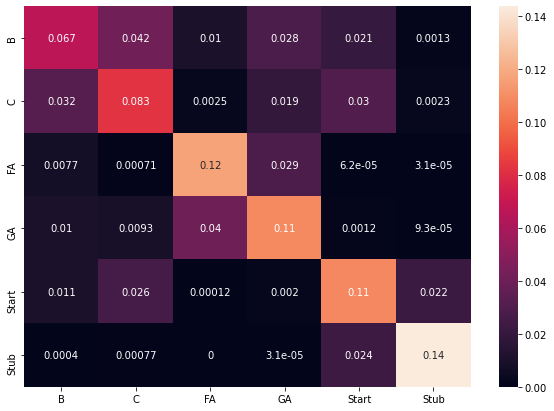

In [90]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix/32347, annot=True)   # 32347 is the number counts

We can see from the confusion matrix that, the x axes is the groud truth label, and the y axes is the prediction label. So the diagonal shows the performance of this model. From the metrics on diagonal we can see that the prediction result is not satisfying.


##### We will then see other metrics like precision, recall and f1 score.
> precision: the proportion of predicted Positives is truly Positive
> recall: what proportion of actual Positives is correctly classified

There is always a trade-off between precision and recall. In our case, I don't think there is a high cost if an article is wrongly classified, but it is individual case dependent. 

In [80]:
statistics = articlequality_info[["statistics"]].dropna()
f1 = list(statistics.loc["f1","statistics"]["labels"].values())
recall = list(statistics.loc["recall","statistics"]["labels"].values())
precision = list(statistics.loc["precision","statistics"]["labels"].values())
stat = pd.DataFrame(precision,index= ["B","C","FA","GA","Start","Stub"], columns=["precision"])
stat["recall"] = recall
stat["f1"]=f1
stat

,precision,recall,f1
B,0.161,0.394,0.229
C,0.229,0.488,0.311
FA,0.031,0.758,0.060
GA,0.063,0.642,0.115
Start,0.770,0.641,0.699
Stub,0.974,0.853,0.910


The table above shows metrics for each class, and we ignored the average-metric (micro and macro) for calculation. 
The average metric is used to calculate the class weights for whole model assessment. We prefer a high precision score as well as a high recall score, but as mentioned before, there is always a tradeoff between precison and recall. So we now have the f1 score, which is a combination of them.

We can see a huge difference in f1 scores for different classes, and if we go back to view the whole statistics, we can also find a huge gap in micro f1 score and macro f1 score. This because in macro average, class will be weighted of same importance, therefore, the model evaluation is easily affected by model performance on small class. For example, we can see that, the better the articles are, the worse the model work on these data. Therefore, the general model performance evaluation can be affected by its poor performance on classes of high quality articles.

##### Train/Test Data

Based on [ORES Documentation](https://www.mediawiki.org/wiki/ORES) there is only general description on the `articlequality` model, nothing on the training data set. So we tried to google "ORES training data" and found the paper _ORES: Facilitating re-mediation of Wikipedia’ssocio-technical problems (A. Halfaker et al.)_. In this paper, we found a [dataset](https://figshare.com/articles/English_Wikipedia_Quality_Asssessment_Dataset/1375406) for model training used on english wikipedia project. Based on its description,"the 2017 dataset is the preferred dataset to use, contains 32,460 articles, and was gathered on 2017/09/10. The 2015 dataset is maintained for historic reference, and contains 30,272 articles gathered on 2015/02/05." And "the datasets have been split into a 90% training set and 10% test set using a stratified random sampling strategy." Further information can also found in their [Github Repository](https://github.com/wikimedia/articlequality/) under folder datasets.

##### References

##### 1. [A Brief Introduction to weakly supervised learning](https://academic.oup.com/nsr/article/5/1/44/4093912)
##### 2. [Wikipedia: Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
##### 3. [ORES: Facilitating re-mediation of Wikipedia's socio-technical problems, A.Halfaker et al. ](https://www.semanticscholar.org/paper/ORES-%3A-Facilitating-remediation-of-Wikipedia-%E2%80%99-s-Halfaker-Geiger/3cef57c5ae8a4d569c9f5231dc77255f97280fe0?p2df)
##### 4. [GitHub Repository for wikimedia project](https://github.com/wikimedia/articlequality) 

#### Machine Learning Algorithm
Gradient Boosting is an ensemble machine learning method that integrates week learning models (decision tress in our case). The `articlequality` model is based on [`GradientBoosting`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) model provided by sklearn.
By reading the [user guide on Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)we can see that the GDB is a generalization of boosting to arbitrary differentiable loss functions combining the classification results from multiple decision trees. The model_info API also gives us information on hyper parameters such as learning_rate, impurity_descrease and criterion. By comparing the model information with sklearn, we found that most parameters are at default.

## [4] Features
> Which features are used and which have the greatest influence on the prediction?

* What features is your model using?
* What do they mean?
* Which is the most important features?
* `https://ores.wikimedia.org/v3/scores/enwiki/991379667/articlequality?features=true`
* Are all models (in all languages of wikipedia), are they using the same features?

## Sample code

In [129]:
import requests
import json

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/yuxin16',
    'From': 'xin.yu@fu-berlin.de'
}

def get_ores_data(rev_id, headers):
    
    # Define the endpoint: This is an example!
    #endpoint = 'https://ores.wikimedia.org/v3/scores/{project}/?models={model}&revids={revids}'
    endpoint = 'https://ores.wikimedia.org/v3/scores/{project}/?models={model}&revids={revids}&features&feature.enwiki.revision.cite_templates=13.0'

    params = {'project' : 'enwiki',
              'model'   : 'articlequality',
              'revids'  : rev_id
              }

    api_call = requests.get(endpoint.format(**params))
    response = api_call.json()
    #data = json.dumps(response)

    return response

In [130]:
d = get_ores_data(485104318,headers)
d

{'enwiki': {'models': {'articlequality': {'version': '0.8.2'}},
  'scores': {'485104318': {'articlequality': {'features': {'feature.english.stemmed.revision.stems_length': 582,
      'feature.enwiki.infobox_images': 0,
      'feature.enwiki.main_article_templates': 0.0,
      'feature.enwiki.revision.category_links': 2.0,
      'feature.enwiki.revision.cite_templates': 13.0,
      'feature.enwiki.revision.cn_templates': 0.0,
      'feature.enwiki.revision.image_links': 0.0,
      'feature.enwiki.revision.image_template': 0.0,
      'feature.enwiki.revision.images_in_tags': 0,
      'feature.enwiki.revision.images_in_templates': 0,
      'feature.enwiki.revision.infobox_templates': 0.0,
      'feature.enwiki.revision.paragraphs_without_refs_total_length': 0.0,
      'feature.enwiki.revision.shortened_footnote_templates': 0.0,
      'feature.enwiki.revision.who_templates': 0.0,
      'feature.len(<datasource.english.idioms.revision.matches>)': 0.0,
      'feature.len(<datasource.english.

***

#### Credits

We release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).

***

#### References

<div id="References"></div>
-[1][ORES#Existing_article_assessment](https://www.mediawiki.org/wiki/ORES#Existing_article_assessment)
